In [216]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from pandas.plotting import autocorrelation_plot
import numpy as np

In [114]:
df=pd.read_csv("base.csv")

In [115]:
df.head()

,Month,Day,Version,Shop,Hour,Volume
0,8,1,actual,Total,1,4930.90
1,8,1,actual,KP,1,2315.77
2,8,1,actual,MP,1,2615.13
3,8,1,actual,unbalance,1,-621.90
4,8,1,plan,Total,1,4309.00


In [116]:
df["Date"]=df["Month"].astype(str)+"/"+df["Day"].astype(str)+"/2019"

In [117]:
df.head()

,Month,Day,Version,Shop,Hour,Volume,Date
0,8,1,actual,Total,1,4930.90,8/1/2019
1,8,1,actual,KP,1,2315.77,8/1/2019
2,8,1,actual,MP,1,2615.13,8/1/2019
3,8,1,actual,unbalance,1,-621.90,8/1/2019
4,8,1,plan,Total,1,4309.00,8/1/2019


In [118]:
df["Time"]=df["Hour"].astype(str)+":00:00"

In [309]:
dfS=df
dfS=dfS[dfS.Version=="actual"][dfS.Shop=="Total"]

/home/denismoroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [311]:
#greater than the start date and smaller than the end date
mask = (dfS['Date'] >= "2019-08-24") & (dfS['Date'] <= "2019-09-03")
dfS=dfS[mask]
dfS

,Month,Day,Version,Shop,Hour,Volume,Date,Time,Timeindex
4991,8,24,actual,Total,1,4804.88,2019-08-24,0 days 01:00:00,2019-08-24 01:00:00
4998,8,24,actual,Total,2,4680.17,2019-08-24,0 days 02:00:00,2019-08-24 02:00:00
5005,8,24,actual,Total,3,5089.58,2019-08-24,0 days 03:00:00,2019-08-24 03:00:00
5012,8,24,actual,Total,4,4482.05,2019-08-24,0 days 04:00:00,2019-08-24 04:00:00
5019,8,24,actual,Total,5,4558.92,2019-08-24,0 days 05:00:00,2019-08-24 05:00:00
5026,8,24,actual,Total,6,4513.62,2019-08-24,0 days 06:00:00,2019-08-24 06:00:00
5033,8,24,actual,Total,7,5372.25,2019-08-24,0 days 07:00:00,2019-08-24 07:00:00
5040,8,24,actual,Total,8,4489.06,2019-08-24,0 days 08:00:00,2019-08-24 08:00:00
5047,8,24,actual,Total,9,4879.02,2019-08-24,0 days 09:00:00,2019-08-24 09:00:00
5054,8,24,actual,Total,10,5014.57,2019-08-24,0 days 10:00:00,2019-08-24 10:00:00


#### 

In [120]:
df=df.dropna()
df.tail()

,Month,Day,Version,Shop,Hour,Volume,Date,Time
20820,11,24,actual,MP,30,1951.97,11/24/2019,30:00:00
20821,11,24,actual,unbalance,30,117.73,11/24/2019,30:00:00
20822,11,24,plan,Total,30,5000.00,11/24/2019,30:00:00
20823,11,24,plan,KP,30,2600.00,11/24/2019,30:00:00
20824,11,24,plan,MP,30,2400.00,11/24/2019,30:00:00


In [121]:
df.Date=pd.to_datetime(df.Date)
df.Time=pd.to_timedelta(df.Time)
df["Timeindex"]=df.Date+df.Time
df["Timeindex"]=pd.to_datetime(df["Timeindex"])

In [122]:
df.head()

,Month,Day,Version,Shop,Hour,Volume,Date,Time,Timeindex
0,8,1,actual,Total,1,4930.90,2019-08-01,01:00:00,2019-08-01 01:00:00
1,8,1,actual,KP,1,2315.77,2019-08-01,01:00:00,2019-08-01 01:00:00
2,8,1,actual,MP,1,2615.13,2019-08-01,01:00:00,2019-08-01 01:00:00
3,8,1,actual,unbalance,1,-621.90,2019-08-01,01:00:00,2019-08-01 01:00:00
4,8,1,plan,Total,1,4309.00,2019-08-01,01:00:00,2019-08-01 01:00:00


In [303]:
df1=df[df.Shop=="Total"]
df1=df1[df1.Version=="actual"]



In [304]:
#greater than the start date and smaller than the end date
mask = (df1['Date'] >= "2019-08-24") & (df1['Date'] <= "2019-09-03")
df1=df1[mask]

In [305]:
df1=df1[["Timeindex","Volume"]]
df1=df1.set_index("Timeindex")

In [306]:
ser=df1.Volume

In [307]:
type(ser)

pandas.core.series.Series

Drawing and analysis

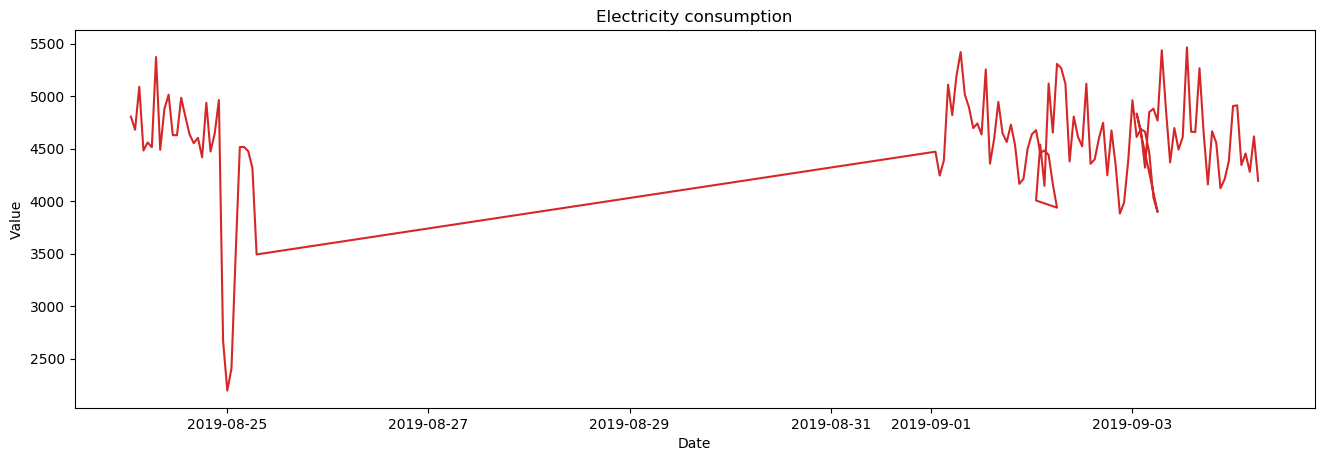

In [308]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(ser, x=ser.index, y=ser, title='Electricity consumption') 

Example

The frequency of decomposition must be an interval, which 'may' repeat. So we have data with 15min frequency and we are looking for a weekly repetition of behavior.

$decompfreq = \cfrac{24h \cdot 60min}{15min} \cdot 7days$

In [181]:
 #Multiplicative Decomposition 
result_mul = seasonal_decompose(ser, model='multiplicative',freq=720)

# Additive Decomposition
result_add = seasonal_decompose(ser, model='additive', freq=720)

/home/denismoroz/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/home/denismoroz/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


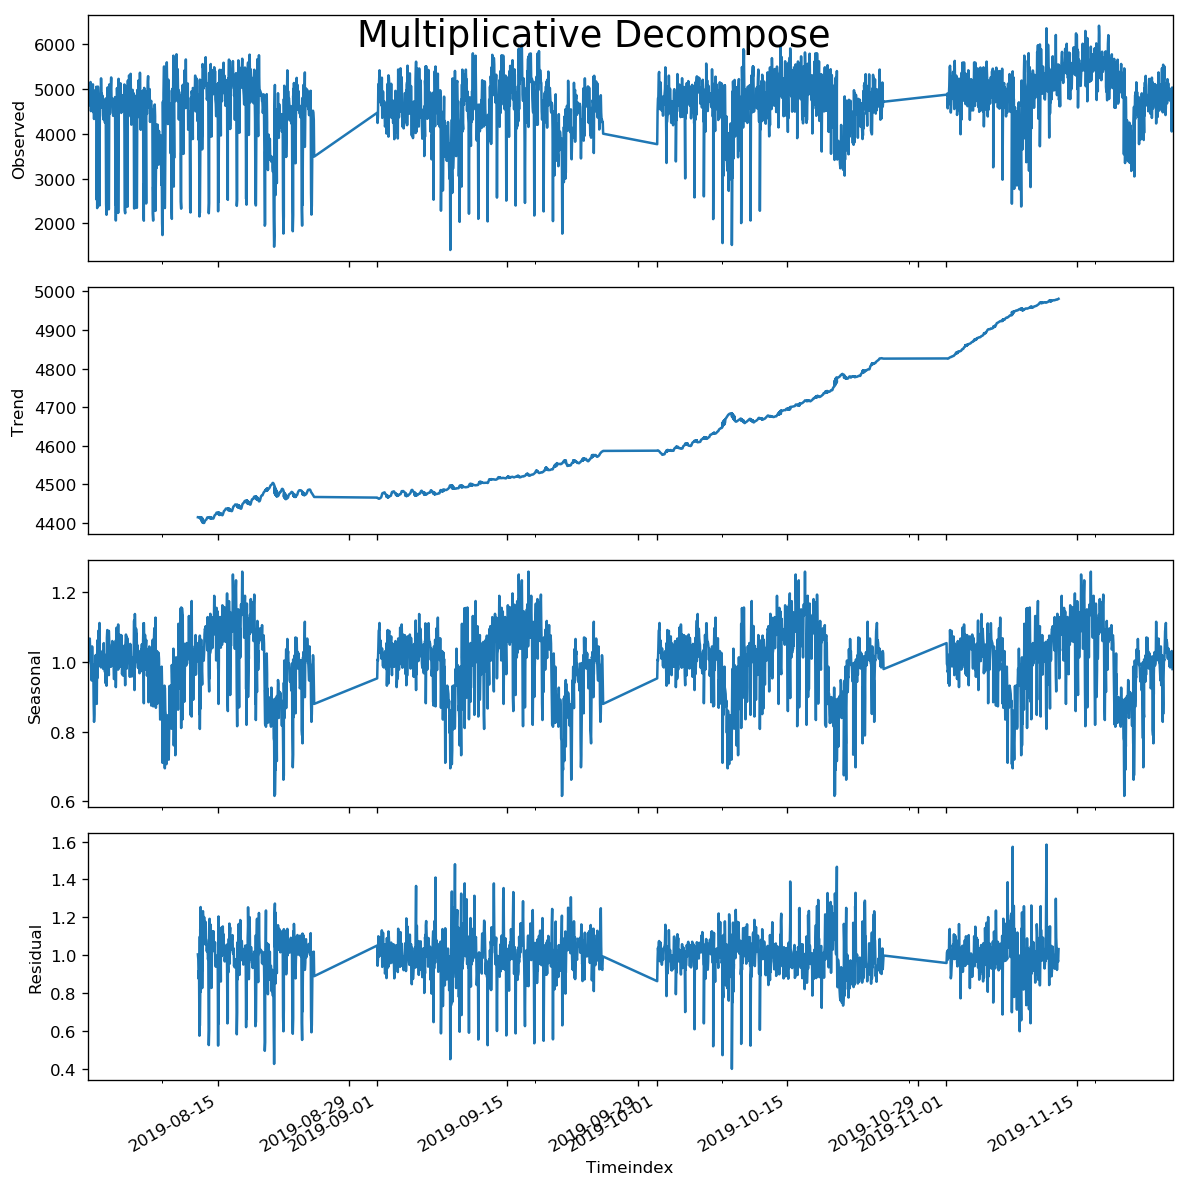

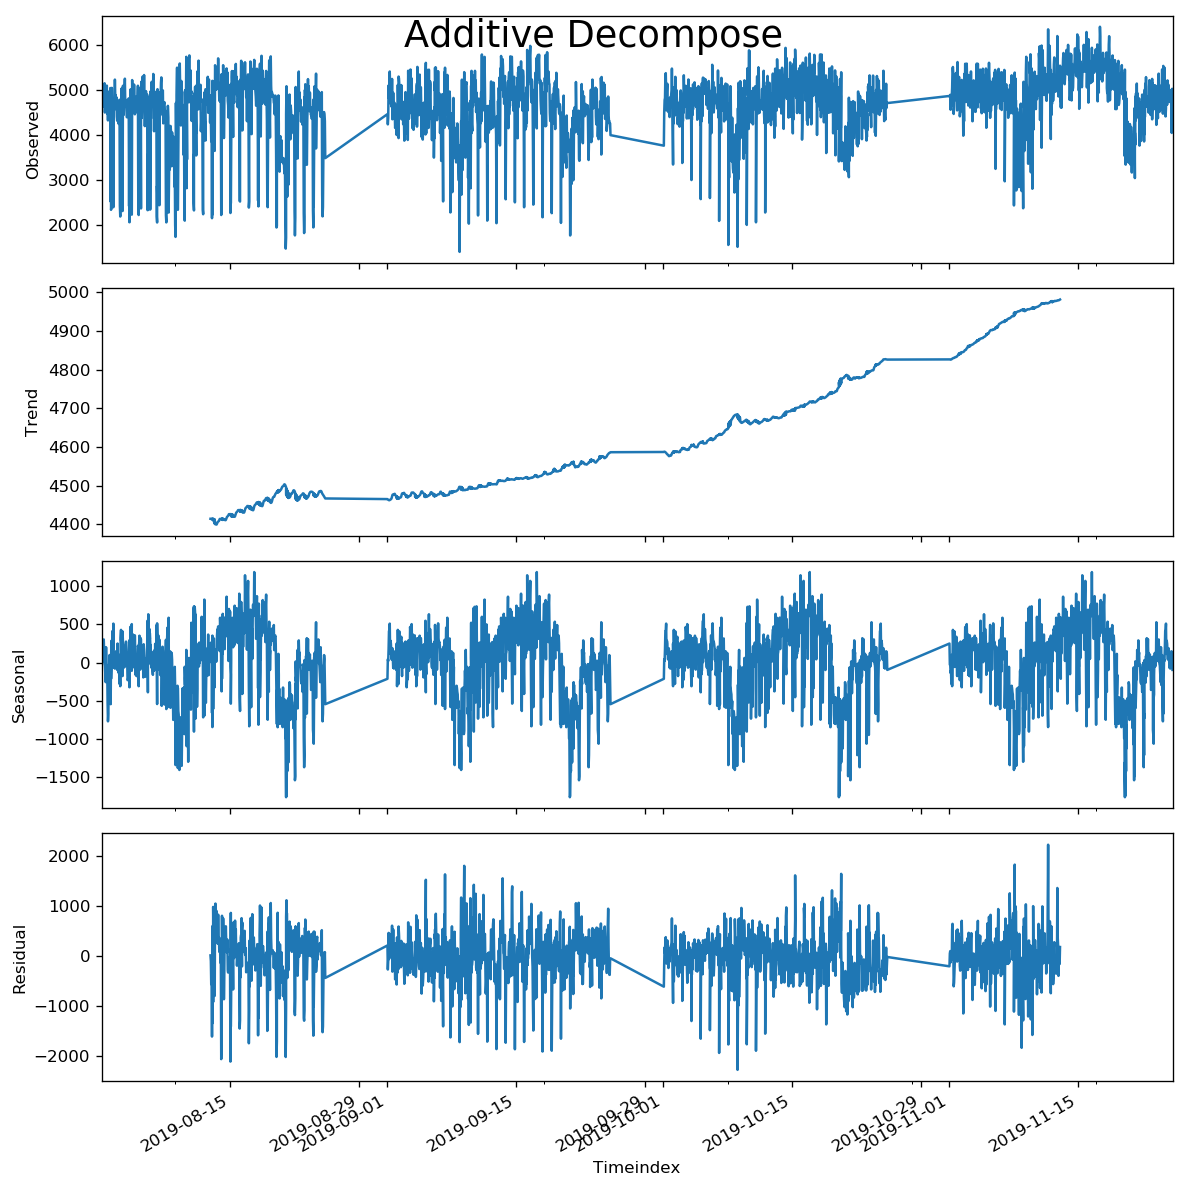

In [182]:
#Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

#### Test for stationarity

In [186]:
from statsmodels.tsa.stattools import adfuller, kpss

In [187]:
#ADF test
result=adfuller(ser,autolag="AIC")
print(f'ADF statistic:{result[0]}')
print(f'p-value:{result[1]}')
for key,value in result[4].items():
    print("Critical value:")
    print(f"  {key},{value}")
    

ADF statistic:-4.094157598223178
p-value:0.00099028639119745
Critical value:
  1%,-3.4326077094598446
Critical value:
  5%,-2.862537504404245
Critical value:
  10%,-2.5673009999844125


As p-value is smaller than 0.05 than the series may be considered stationary.

In [189]:
# KPSS Test
result=kpss(ser,regression="c")
print(f'ADF statistic:{result[0]}')
print(f'p-value:{result[1]}')
for key,value in result[3].items():
    print("Critical value:")
    print(f"  {key},{value}")

ADF statistic:2.455994623709069
p-value:0.01
Critical value:
  10%,0.347
Critical value:
  5%,0.463
Critical value:
  2.5%,0.574
Critical value:
  1%,0.739


/home/denismoroz/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


#### Detrending

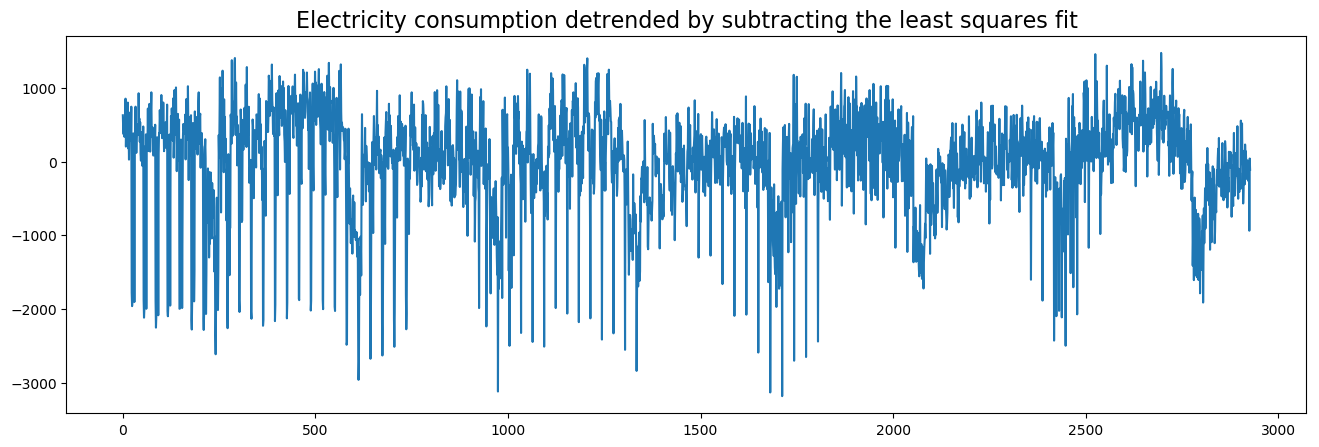

In [194]:
#Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(ser)
plt.figure(figsize=(16,5), dpi=100)
plt.plot(detrended)
plt.title('Electricity consumption detrended by subtracting the least squares fit', fontsize=16)
plt.show()

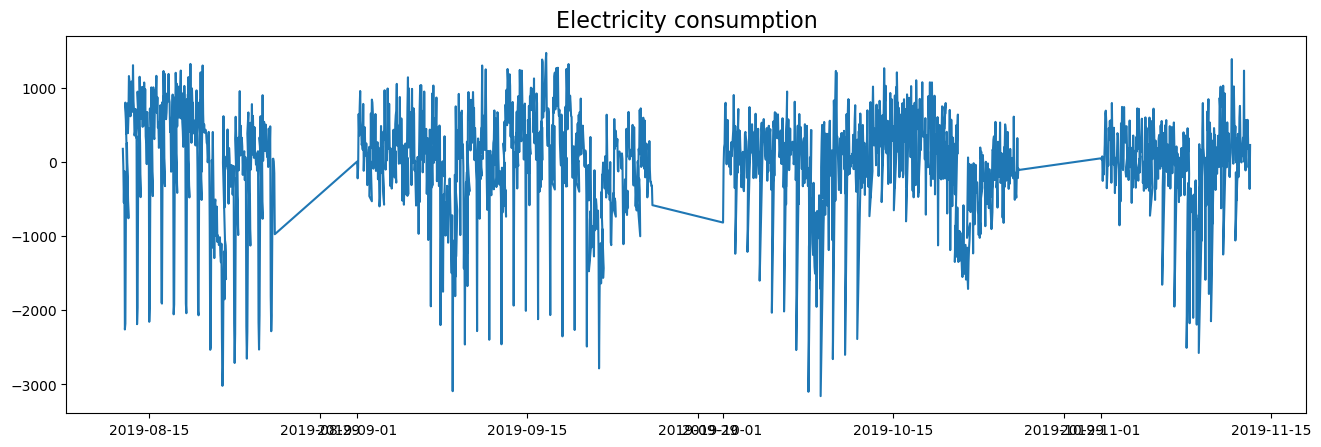

In [199]:
#Using statmodels: Subtracting the Trend Component.
plt.figure(figsize=(16,5), dpi=100)
detrended = ser - result_mul.trend
plt.plot(detrended)
plt.title('Electricity consumption', fontsize=16)
plt.show()

#### Autocorrelation 

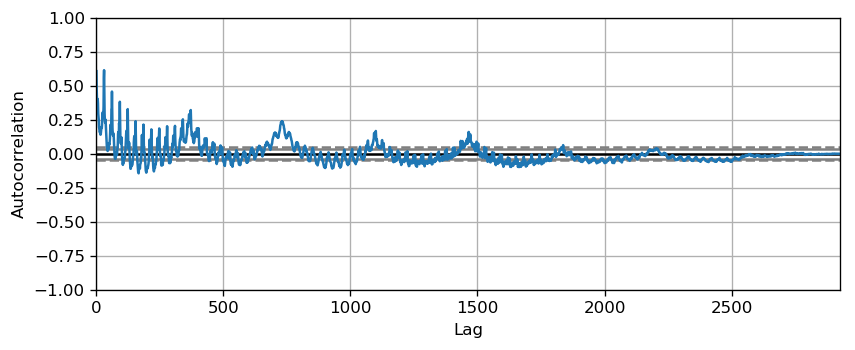

In [212]:
autocorrelation_plot(ser)
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':120})
plt.show()

In [219]:
np.average(ser[-24])

5128.65